In [64]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import seaborn as sns
import os
import scipy 

from matplotlib import cm
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

In [65]:
#read data
path="C:/data/SAM_cases/ASTEX_cold2.6_2D_for2Danim_20min/"

tmp = glob.glob(path + '*80min*bin2D_1.nc')
f  = xr.open_dataset(tmp[0])

tmp = glob.glob(path + '*80min*bin2D_2.nc')
f2  = xr.open_dataset(tmp[0])

In [149]:
#variables to plot
x = f['x'].values
z = f['z'].values[0:500]
t1 = f['time'].values
t2 = f2['time'].values


W1 = f['W'].values[:,0:500,:]
QN1 = f['QN'].values[:,0:500,:]

W2 = f2['W'].values[:,0:500,:]
QN2 = f2['QN'].values[:,0:500,:]

t = np.concatenate([t1, t2], 0)
W = np.concatenate([W1, W2], 0)
QN = np.concatenate([QN1, QN2], 0)

nx = len(x)
nz = len(z)
nt = len(t)

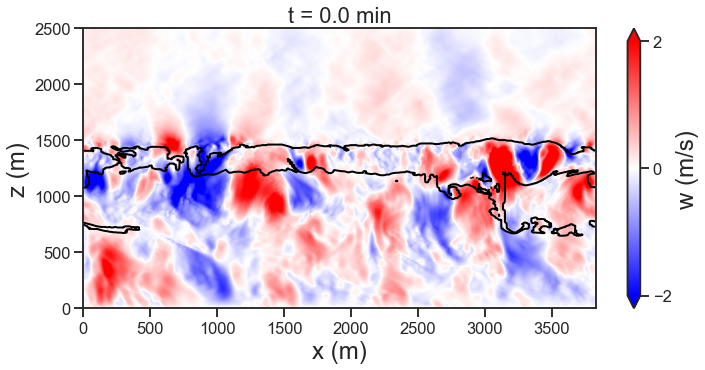

In [153]:
sns.set(context="talk", style="ticks", font_scale=1.)
# First set up the figure, the axis, and the plot element we want to animate
i =  0

fig, ax = plt.subplots(1,1,figsize=(10, 5))

cmin = -2.
cmax = 2.

oax = ax.contourf(x,z,W[i,:,:], levels = np.linspace(cmin, cmax, 256), cmap = cm.bwr, vmin = cmin, vmax = cmax, extend="both")
cbar = fig.colorbar(oax, ax = ax, ticks=[cmin, 0, cmax])

oax1 = ax.contour(x,z,QN[i,:,:], levels = [0.01], linewidths=2, colors = 'black')

ax.set_ylim([0., 2500])
ax.set_title('t = ' + str(round(24.*60.*(t[i] - t[0]))) + ' min', fontsize=22)
ax.set_xlabel('x (m)', fontsize=24)  # Add an x-label to the axes.
ax.set_ylabel('z (m)', fontsize=24)  # Add an x-label to the axes.

cbar.set_label('w (m/s)', fontsize=24)

plt.tight_layout(pad = 0.1)

In [154]:
# animation function. This is called sequentially
def animate(i):
    ax.clear()
    
    oax = ax.contourf(x,z,W[i,:,:], levels = np.linspace(cmin, cmax, 256), cmap = cm.bwr, vmin = cmin, vmax = cmax, extend="both")

    oax1 = ax.contour(x,z,QN[i,:,:], levels = [0.01], linewidths=2, colors = 'black')

    ax.set_ylim([0., 2500])
    ax.set_title('t = ' + str(round(24.*60.*(t[i] - t[0]))) + ' min', fontsize=22)
    ax.set_xlabel('x (m)', fontsize=24)  # Add an x-label to the axes.
    ax.set_ylabel('z (m)', fontsize=24)  # Add an x-label to the axes.
    
    plt.tight_layout(pad = 0.1)

In [155]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,
                               frames=nt, interval=50)

plt.rcParams['animation.embed_limit'] = 2**128

HTML(anim.to_html5_video())

<Figure size 432x288 with 0 Axes>

In [3]:
f

<xarray.Dataset>
Dimensions:  (time: 500, x: 256, z: 512)
Coordinates:
  * x        (x) float32 0.0 15.0 30.0 45.0 60.0 ... 3780.0 3795.0 3810.0 3825.0
  * z        (z) float32 10.5 22.5 37.5 52.5 ... 1019.23816 1017.47015 1015.7042
  * time     (time) float32 166.38889 166.38896 ... 166.42348 166.42354
Data variables:
    p        (z) float32 ...
    U        (time, z, x) float32 ...
    V        (time, z, x) float32 ...
    W        (time, z, x) float32 ...
    PP       (time, z, x) float32 ...
    QRAD     (time, z, x) float32 ...
    TABS     (time, z, x) float32 ...
    QV       (time, z, x) float32 ...
    QN       (time, z, x) float32 ...
    QP       (time, z, x) float32 ...

In [66]:
#variables to plot
x = f['x'].values
z = f['z'].values[0:500]
t1 = f['time'].values
t2 = f2['time'].values


U1 = f['U'].values[:,0:500,:]
W1 = f['W'].values[:,0:500,:]
QV1 = f['QV'].values[:,0:500,:]
QN1 = f['QN'].values[:,0:500,:]
QP1 = f['QP'].values[:,0:500,:]

U2 = f2['U'].values[:,0:500,:]
W2 = f2['W'].values[:,0:500,:]
QV2 = f2['QV'].values[:,0:500,:]
QN2 = f2['QN'].values[:,0:500,:]
QP2 = f2['QP'].values[:,0:500,:]

t = np.concatenate([t1, t2], 0)
W = np.concatenate([W1, W2], 0)
U = np.concatenate([U1, U2], 0)
QV = np.concatenate([QV1, QV2], 0)
QN = np.concatenate([QN1, QN2], 0)
QP = np.concatenate([QP1, QP2], 0)

nx = len(x)
nz = len(z)
nt = len(t)

In [29]:
# # interpolate data to coarse grids

# Utmp =  U[0,:,:]
# Wtmp =  W[0,:,:]

# xx = np.linspace(x[0], x[-1], 30)
# zz = np.linspace(z[0], z[-1], 60)

# fu = scipy.interpolate.interp2d(x, z, Utmp, kind='linear')
# fw = scipy.interpolate.interp2d(x, z, Wtmp, kind='linear')

# uu = fu(xx, zz)
# ww = fw(xx, zz)

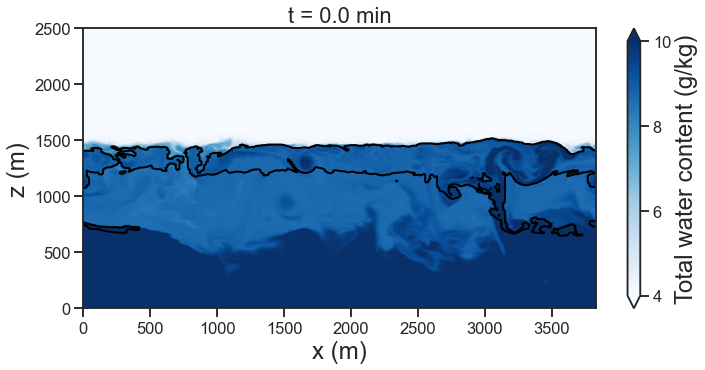

In [98]:
sns.set(context="talk", style="ticks", font_scale=1.)
# First set up the figure, the axis, and the plot element we want to animate
i =  0

fig, ax = plt.subplots(1,1,figsize=(10, 5))

cmin = 4.
cmax = 10.

oax = ax.contourf(x,z,QV[i,:,:] + QN[i,:,:], levels = np.linspace(cmin, cmax, 256), cmap = cm.Blues, vmin = cmin, vmax = cmax, extend="both")
cbar = fig.colorbar(oax, ax = ax, ticks=[cmin, 6, 8, cmax])

oax1 = ax.contour(x,z,QN[i,:,:], levels = [0.01], linewidths=2, colors = 'black')

# oax2 = ax.contourf(x,z,QP[i,:,:], levels = [0.001, 0.01], colors = 'coral', alpha = 0.3)

ax.set_ylim([0., 2500])
ax.set_title('t = ' + str(round(24.*60.*(t[i] - t[0]))) + ' min', fontsize=22)
ax.set_xlabel('x (m)', fontsize=24)  # Add an x-label to the axes.
ax.set_ylabel('z (m)', fontsize=24)  # Add an x-label to the axes.

cbar.set_label('Total water content (g/kg)', fontsize=24)

# Q = ax.quiver(xx, zz, uu, ww, units='xy', headwidth = 3, headlength = 4, color = 'red')

plt.tight_layout(pad = 0.1)

In [99]:
# animation function. This is called sequentially
def animate1(i):
#     Utmp =  U[i,:,:]
#     Wtmp =  W[i,:,:]

#     xx = np.linspace(x[0], x[-1], 30)
#     zz = np.linspace(z[0], z[-1], 60)

#     fu = scipy.interpolate.interp2d(x, z, Utmp, kind='linear')
#     fw = scipy.interpolate.interp2d(x, z, Wtmp, kind='linear')

#     uu = fu(xx, zz)
#     ww = fw(xx, zz)
    
    ax.clear()
    
    oax = ax.contourf(x,z,QV[i,:,:] + QN[i,:,:], levels = np.linspace(cmin, cmax, 256), cmap = cm.Blues, vmin = cmin, vmax = cmax, extend="both")
    oax1 = ax.contour(x,z,QN[i,:,:], levels = [0.01], linewidths=2, colors = 'black')

#     oax2 = ax.contourf(x,z,QP[i,:,:], levels = [0.001, 0.01], colors = 'coral', alpha = 0.3)
    
    ax.set_ylim([0., 2500])
    ax.set_title('t = ' + str(round(24.*60.*(t[i] - t[0]))) + ' min', fontsize=22)
    ax.set_xlabel('x (m)', fontsize=24)  # Add an x-label to the axes.
    ax.set_ylabel('z (m)', fontsize=24)  # Add an x-label to the axes.
    
#     Q = ax.quiver(xx, zz, uu, ww, units='xy', headwidth = 3, headlength = 4, color = 'red')
    
    plt.tight_layout(pad = 0.1)

In [100]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate1,
                               frames=nt, interval=50)

plt.rcParams['animation.embed_limit'] = 2**128

HTML(anim.to_html5_video())

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>